### To dos
- check skew of variables
    - apply transformations as required
- convert categoricals to dummy variables
- deal with nulls/nans (or don't)
- split off dependent/independent variables
- scale/normalise
- split into train/validate


Let's start off with some imports

In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from src.analyse import test_trans
from src.analyse import analyse

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 200
plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['figure.dpi'] = 100

We'll then load up the training data and derive a list of numerical and categorical features

In [2]:
train = pd.read_csv("data/train.csv")

# numeric = [var for var in train.columns if train.dtypes[var] != 'object']
# category = [var for var in train.columns if train.dtypes[var] == 'object']


Now let's analyse our null values, by feature type

In [3]:
# num_nulls = train[numeric].isnull().sum().sort_values(ascending=False)
# print("Numerical features with null values:\n{}".format(num_nulls[num_nulls > 0]))

# print()

# cat_nulls = train[category].isnull().sum().sort_values(ascending=False)
# print("Categorical features with null values:\n{}".format(cat_nulls[cat_nulls > 0]))


# nulls = train.isnull().sum()
# nulls = nulls[nulls > 0]
# nulls = nulls.reset_index()
# nulls.columns = ['variable', 'count']
# nulls['percent'] = nulls['count'] / len(train)
# nulls.sort_values("count", ascending=False, inplace=True)
# nulls

Numerical features with null values should be replaceable with zeros. For the categoricals, we need to dig a little deeper.

`PoolQC`, `MiscFeature`, `Alley`, `Fence`, and `FireplaceQu` all have ~50% or more missing values. Let's check in turn if we should drop the variable or convert it to a dummy.

The `Garage*`, `Bsmt*`, and `MsnVnr*` variables each sharing the same values would indicate these nulls communicate an absence of that feature. We can capture this with a dummy variable which we create later

In [4]:
# high_null = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"]
# for feat in high_null:
#     print(train[feat].unique())
    
# train['LotFrontage'].dtype

In my estimation, `PoolQC` is probably covered adequately 
by the `PoolArea` feature; ditto `FireplaceQu` & `Fireplaces`; 
`MiscFeature`, with so many null values is unlikely to add value.

We will delete these three, along with the unneeded `Id` variable

In [5]:
# if len(train.columns) == 81:
#     train = train.drop(['PoolQC', 'MiscFeature', "FireplaceQu", "Id"], axis=1)

Before we create our dummy variables, let's look at the last null value we haven't address: Electrical. Given that there is just one of entry, let's drop the data point with no electrical (how does that work anyway?)

In [6]:
# print(train[train["Electrical"].isna() == True]["Electrical"])
# nulls = train["Electrical"].isna()
# train.drop(nulls.loc[nulls == True].index)
#.loc[lambda x: x['Electrical']==True].index
# if len(train) == 1460
#     train.drop(1379, inplace=True)


Let's make those dummy variables. We will utilise the `pandas` built-in `get_dummies()`. Using this function, we capture natively the houses without garages, pools, etc. as entries with 0s for all the categorical options for a given variable. 

To address this on the numerical variable side, we will `fillna` with 0s

In [7]:
# numeric = [var for var in train.columns if train.dtypes[var] != 'object']
# category = [var for var in train.columns if train.dtypes[var] == 'object']

# categoricals = pd.get_dummies(train[category])
# numericals = train[numeric].fillna(0)
# dataset = pd.merge(numericals, categoricals, left_index=True, right_index=True)
# dataset

In [8]:

# y = train['SalePrice'].sort_values()
# # x = np.arange(len(y))
# # fig, ax = plt.subplots(1,2)
# # plt.figure(1); plt.title('Johnson SU')e 800x1200 with 0 A
# # sns.displot(y)

# number_of_bins = 50
# bin_cutoffs = np.linspace(np.percentile(y,0), np.percentile(y,99),number_of_bins)
# h = plt.hist(y, bins = bin_cutoffs, color='0.75')

# # Create the plot
# # sns.displot(y)
# params = st.lognorm.fit(y)
# # print(params)

# fitted_pdf = st.lognorm.pdf(y, params[0], loc=params[-2], scale=params[-1])
# scale_pdf = np.trapz(h[0], h[1][:-1]) / np.trapz(fitted_pdf, y)
# fitted_pdf *= scale_pdf
# # sns.lineplot(x=y, y=fitted_pdf)
# plt.plot(y, fitted_pdf)
# # sns.displot(y)
# # plt.figure(2); plt.title('Normal')
# # sns.distplot(y, kde=False, fit=st.norm)
# # plt.figure(3); plt.title('Log Normal')
# # sns.distplot(y, kde=False, fit=st.lognorm)

In [9]:
analyse(train)

                Skewness    Kurtosis
MiscVal        24.476794  701.003342
PoolArea       14.828374  223.268499
LotArea        12.207688  203.243271
3SsnPorch      10.304342  123.662379
LowQualFinSF    9.011341   83.234817
KitchenAbvGr    4.488397   21.532404
BsmtFinSF2      4.255261   20.113338
ScreenPorch     4.122214   18.439068
BsmtHalfBath    4.103403   16.396642
EnclosedPorch   3.089872   10.430766
MasVnrArea      2.669084   10.082417
OpenPorchSF     2.364342    8.490336
LotFrontage     2.163569   17.452867
SalePrice       1.882876    6.536282
BsmtFinSF1      1.685503   11.118236
WoodDeckSF      1.541376    2.992951
TotalBsmtSF     1.524255   13.250483
MSSubClass      1.407657    1.580188
1stFlrSF        1.376757    5.745841
GrLivArea       1.366560    4.895121
BsmtUnfSF       0.920268    0.474994
2ndFlrSF        0.813030   -0.553464
OverallCond     0.693067    1.106413
TotRmsAbvGrd    0.676341    0.880762
HalfBath        0.675897   -1.076927
Fireplaces      0.649565   -0.217237
B

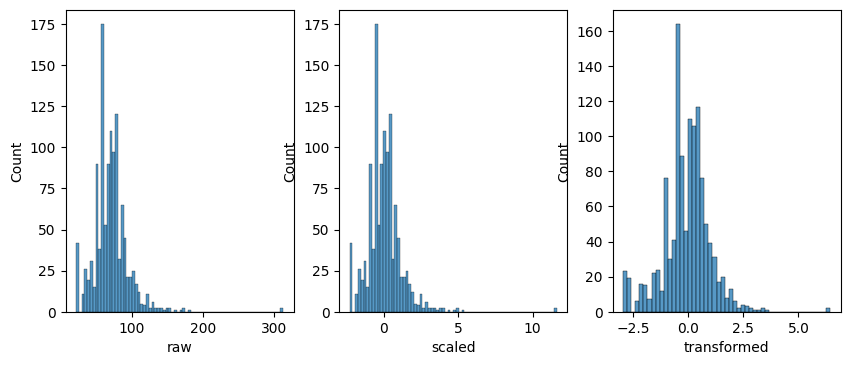

In [12]:
test_trans(train[['LotFrontage']])